# Pouvoir calorifique

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
from constants import *

mpl.rcParams.update(rcParams)

In [2]:
def load(filename: str):
    return pd.read_csv(filename)

## Theorique

In [3]:
H_theo = 45.8 # MJ

## Mesuré

In [4]:
gaz_camping = load("../data/gaz_camping.csv")
gaz_camping

,M0 [g],M1 [g],m0 [g],m1 [g],Mc [g],T0 [degC],T1 [degC]
0,0,950.0,5.25,6.60,3.133333,14.6,30.6
1,0,908.3,0.08,1.35,3.133333,14.3,30.2
2,0,799.7,2.03,3.18,3.133333,14.0,29.8
3,0,837.8,3.84,4.98,3.133333,13.8,29.3
4,0,887.9,5.59,6.78,3.133333,13.6,28.7
5,0,879.2,0.14,1.31,3.133333,13.4,28.2
6,0,1070.6,2.06,3.45,3.133333,13.1,27.8
7,0,910.0,4.06,5.23,3.133333,12.9,27.4
8,0,979.9,6.00,7.25,3.133333,12.7,26.8
9,0,868.9,0.13,1.21,3.133333,12.6,26.7


In [5]:
masse_eau = unp.uarray(gaz_camping["M1 [g]"] * 1e-3, delta_M)
masse_gaz = unp.uarray(gaz_camping["m1 [g]"] * 1e-3, delta_m) - unp.uarray(gaz_camping["m0 [g]"] * 1e-3, delta_m)
temperature_diff = unp.uarray(gaz_camping["T1 [degC]"], delta_T) - unp.uarray(gaz_camping["T0 [degC]"], delta_T)
masse_eau_cond = unp.uarray(gaz_camping["Mc [g]"] * 1e-3, delta_Mc)

In [6]:
H = (C_m_eau * masse_eau * temperature_diff - masse_eau_cond * l_vap_eau) / masse_gaz
H *= 1e-6  # MJ

In [7]:
for h in H:
    print(f"H = {h:.1uP} MJ")

H = 42±1 MJ
H = 42±1 MJ
H = 40±1 MJ
H = 41±1 MJ
H = 41±1 MJ
H = 40±1 MJ
H = 42±1 MJ
H = 41±1 MJ
H = 41±1 MJ
H = 41±1 MJ
H = 40±1 MJ
H = 40±1 MJ


In [8]:
H_avg = np.mean(H)
# Devrait être calculé par uncertainties, maaaaaais bon faudrait
# calculer à la main @martin
H_std_dev = (1 / (len(H) - 1) * np.sum((H - H_avg) ** 2)) ** 0.5

In [9]:
print(f"H moyen = {H_avg:.1uP} MJ")
print(f"H std dev = {H_std_dev:.1uP} MJ")

H moyen = 41.0±0.3 MJ
H std dev = 0.8±0.3 MJ


In [15]:
print(f"Ecart relatif: {(H_theo - H_avg) / H_theo:%}")

Ecart relatif: (10.6+/-0.7)%


## Plot

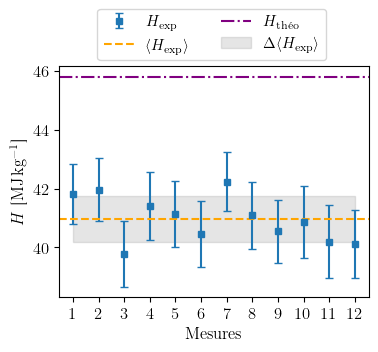

In [17]:
samples = np.arange(len(H))
plt.errorbar(samples, unp.nominal_values(H), yerr=unp.std_devs(H), marker='s', ms=5, ls='none', label=r"$H_\textrm{exp}$")
plt.fill_between(samples, H_avg.n - H_std_dev.n, H_avg.n + H_std_dev.n, color='tab:grey', alpha=0.2, label=r"$\Delta\langle H_\textrm{exp} \rangle$")

plt.axhline(H_theo, color='purple', linestyle="-.", label=r"$H_\textrm{théo}$")
plt.axhline(H_avg.n, color='orange', linestyle="--", label=r"$\langle H_\textrm{exp} \rangle$")

plt.xticks(samples, samples + 1)
# plt.xticks(samples, samples + 1, rotation=-45)
plt.xlabel("Mesures")
plt.ylabel(r"$H$ [\si{\mega\joule\per\kilo\gram}]")
plt.legend(reverse=True, ncols=2, loc='upper left', bbox_to_anchor=(0.1, 1.28))

plt.savefig('../figures/gaz_camping.pdf', bbox_inches="tight")

# CO2

In [12]:
m_mol_mix = m_mol_butane*0.8 + m_mol_propane*0.2

mol_gaz = masse_gaz*1e3/m_mol_mix

mol_co2 = (3*0.2 + 4*0.8)*mol_gaz
mol_co2_mean = np.mean(mol_co2)
print(f"CO2 expulsé moyen par exp = {mol_co2_mean:.1uP} mol")

mass_co2 = mol_co2*m_mol_co2
mass_co2_mean = np.mean(mass_co2)
print(f"CO2 expulsé moyen par exp = {mass_co2_mean:.1uP} g")

# mass_co2_std = unp.std_devs(mass_co2_mean)

mass_co2_std = unp.nominal_values((1 / (len(mass_co2) - 1) * np.sum((mass_co2 - mass_co2_mean) ** 2)) ** 0.5)


CO2 expulsé moyen par exp = 0.0820±0.0006 mol
CO2 expulsé moyen par exp = 3.61±0.02 g


In [18]:
# CO2 pour un meme temps:
m_mol_mix = m_mol_butane*0.8 + m_mol_propane*0.2
mol_co2 = 2 * masse_gaz[7] * 1e3 / m_mol_mix
mass_co2 = mol_co2 * m_mol_co2
print(f"CO2 pour M=910g: {mass_co2} g")

CO2 pour M=910g: 1.86+/-0.05 g


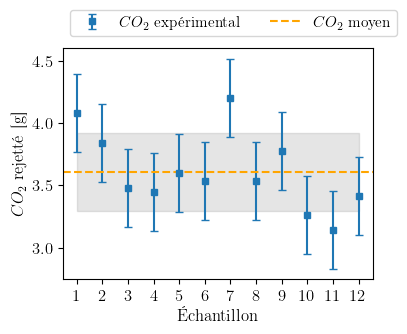

In [13]:
plt.errorbar(samples, unp.nominal_values(mass_co2), yerr=mass_co2_std, marker='s', ms=5, ls='none', label=r"$CO_2$ expérimental")
plt.fill_between(samples, mass_co2_mean.n - mass_co2_std, mass_co2_mean.n + mass_co2_std, color='tab:grey', alpha=0.2)

plt.axhline(mass_co2_mean.n, color='orange', linestyle="--", label=r"$CO_2$ moyen")

plt.xticks(samples, samples + 1)
# plt.xticks(samples, samples + 1, rotation=-45)
plt.xlabel("Échantillon")
plt.ylabel(r"$CO_2$ rejetté [\si{\gram}]")
plt.legend(reverse=True, ncols=3, loc='upper left', bbox_to_anchor=(0, 1.2))

plt.savefig('../figures/mass_co2_mix.pdf', bbox_inches="tight")